In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df[df["Last Updated"] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
df.at[10472,'Last Updated']= 'February 11, 2018'
df.at[10472, 'Genres'] = np.nan
df.at[10472, 'Type'] = 'Free'
df.at[10472, 'Price'] = 0
df.at[10472, 'Size'] = '3.0M'
df.at[10472, 'Installs'] = "1,000+"
df.at[10472, 'Rating'] = 1.9
df.at[10472, 'Reviews'] = 19.0
df.at[10472, 'Content Rating'] = 'Everyone'
df.at[10472, 'Category'] = np.nan

In [8]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [9]:
df['date_of_last_updated'] = pd.to_datetime(df['Last Updated'])
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date_of_last_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01


In [10]:
df.drop(['Last Updated'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   10841 non-null  object        
 1   Category              10840 non-null  object        
 2   Rating                9367 non-null   float64       
 3   Reviews               10841 non-null  object        
 4   Size                  10841 non-null  object        
 5   Installs              10841 non-null  object        
 6   Type                  10840 non-null  object        
 7   Price                 10841 non-null  object        
 8   Content Rating        10841 non-null  object        
 9   Genres                10840 non-null  object        
 10  Current Ver           10833 non-null  object        
 11  Android Ver           10838 non-null  object        
 12  date_of_last_updated  10841 non-null  datetime64[ns]
dtypes: datetime64[ns

In [12]:
df.at[10839,'Size']= np.nan
df.at[10839, 'Current Ver']= np.nan
df.at[10839, 'Android Ver']= np.nan

In [13]:
def sizer(x):
    x = str(x).replace(",","")
    val = x[-1]
    if len(x) > 6:
        return None
    if val == 'M':
        return float(x[:-1])
    elif val == 'K':
        return float(x[:-1] / 1024)
    
df["size_in_megabyte"] = df["Size"].apply(sizer)

In [14]:
df.drop(["Size"], axis = 1, inplace=True)

In [17]:
def price(x):
    x=str(x).replace("$","")
    return x
df["price_in_dollars"] = df["Price"].apply(price)
df.drop(["Price"], axis = 1, inplace=True)

In [19]:
df["price_in_dollars"] = pd.to_numeric(df["price_in_dollars"], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   10841 non-null  object        
 1   Category              10840 non-null  object        
 2   Rating                9367 non-null   float64       
 3   Reviews               10841 non-null  object        
 4   Installs              10841 non-null  object        
 5   Type                  10840 non-null  object        
 6   Content Rating        10841 non-null  object        
 7   Genres                10840 non-null  object        
 8   Current Ver           10832 non-null  object        
 9   Android Ver           10837 non-null  object        
 10  date_of_last_updated  10841 non-null  datetime64[ns]
 11  size_in_megabyte      8830 non-null   float64       
 12  price_in_dollars      10841 non-null  float64       
dtypes: datetime64[ns

In [21]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors='coerce')

In [22]:
df['year'] = df['date_of_last_updated'].dt.year
df['Month'] = df['date_of_last_updated'].dt.month

In [23]:
df.head(2)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,date_of_last_updated,size_in_megabyte,price_in_dollars,year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,19.0,0.0,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,14.0,0.0,2018,1


In [24]:
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

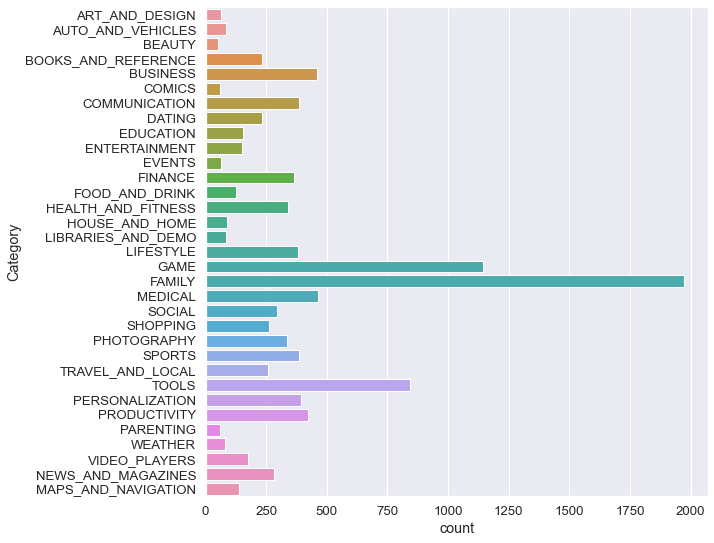

In [25]:
sns.countplot(y="Category", data=df)

# The Rating for each category and the Type

In [26]:
df["Rating"].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
1.9      14
2.2      14
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

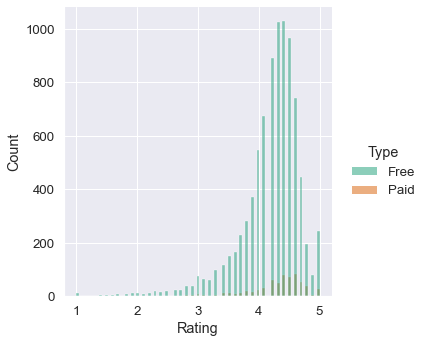

In [27]:
sns.displot(x="Rating", data=df, hue="Type", palette='Dark2')

# Type of each category 

In [28]:
df["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

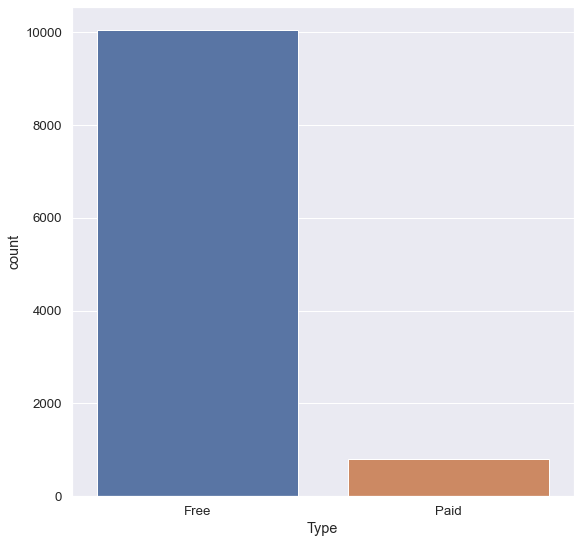

In [29]:
sns.countplot(x="Type", data=df)

# Content Rating

In [30]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [31]:
df["Content Rating"].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

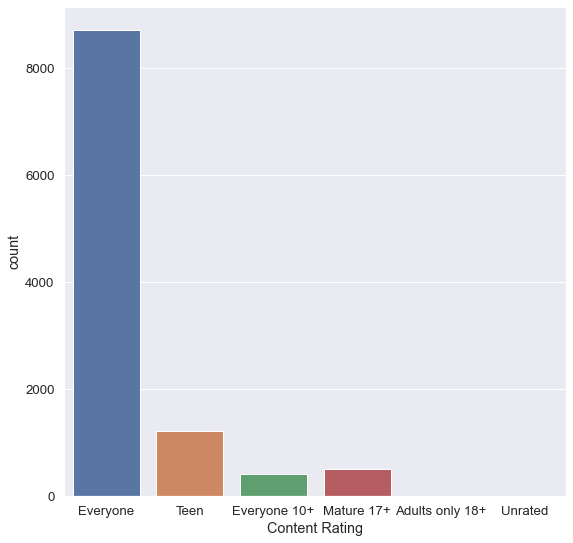

In [32]:
sns.countplot(x="Content Rating", data=df)

# Category by year

In [33]:
category_by_year = df.groupby("year")['Category'].value_counts().reset_index(level=0).rename(columns={'Category': 'Category '}, index={'index': 'Category'})

In [34]:
category_by_year

,year,Category
Category,,
FAMILY,2010,1
TOOLS,2011,6
GAME,2011,4
BOOKS_AND_REFERENCE,2011,1
BUSINESS,2011,1
...,...,...
PARENTING,2018,51
COMICS,2018,50
EVENTS,2018,46


# Size_in_megabyte

In [35]:
df["size_in_megabyte"].value_counts()

11.0    198
12.0    196
14.0    194
13.0    191
15.0    184
       ... 
84.0      9
89.0      9
86.0      8
1.0       7
90.0      6
Name: size_in_megabyte, Length: 181, dtype: int64

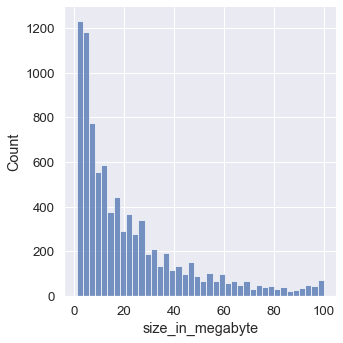

In [36]:
sns.displot(x="size_in_megabyte", data=df)

# Find a relation between every column

In [37]:
df.corr()

,Rating,Reviews,size_in_megabyte,price_in_dollars,year,Month
Rating,1.000000,0.068147,0.076190,-0.021851,0.137317,0.018075
Reviews,0.068147,1.000000,0.237284,-0.009666,0.075528,0.045948
size_in_megabyte,0.076190,0.237284,1.000000,-0.022448,0.173848,0.037546
price_in_dollars,-0.021851,-0.009666,-0.022448,1.000000,-0.007900,0.006952
year,0.137317,0.075528,0.173848,-0.007900,1.000000,-0.187365
Month,0.018075,0.045948,0.037546,0.006952,-0.187365,1.000000


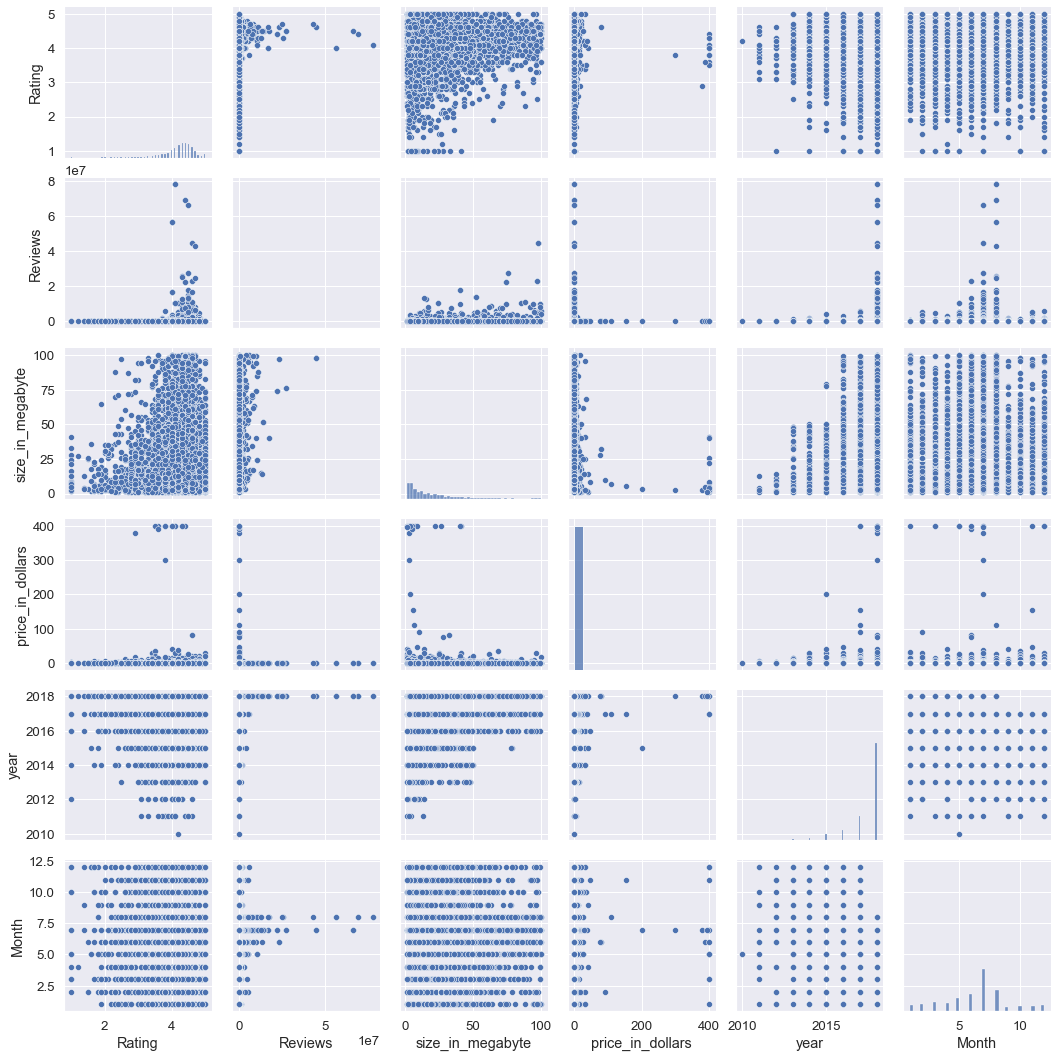

In [38]:
sns.pairplot(data=df)

There is no relation between the columns and all the others

In [39]:
df.describe()

,Rating,Reviews,size_in_megabyte,price_in_dollars,year,Month
count,9367.000000,1.084100e+04,8830.000000,10841.000000,10841.000000,10841.000000
mean,4.191513,4.441119e+05,22.268358,1.027273,2017.399779,6.421917
std,0.515735,2.927629e+06,22.628339,15.948971,1.100879,2.578619
min,1.000000,0.000000e+00,1.000000,0.000000,2010.000000,1.000000
25%,4.000000,3.800000e+01,5.400000,0.000000,2017.000000,5.000000
50%,4.300000,2.094000e+03,14.000000,0.000000,2018.000000,7.000000
75%,4.500000,5.476800e+04,31.000000,0.000000,2018.000000,8.000000
max,5.000000,7.815831e+07,100.000000,400.000000,2018.000000,12.000000


In [40]:
df["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

# Installs

<AxesSubplot:xlabel='count', ylabel='Installs'>

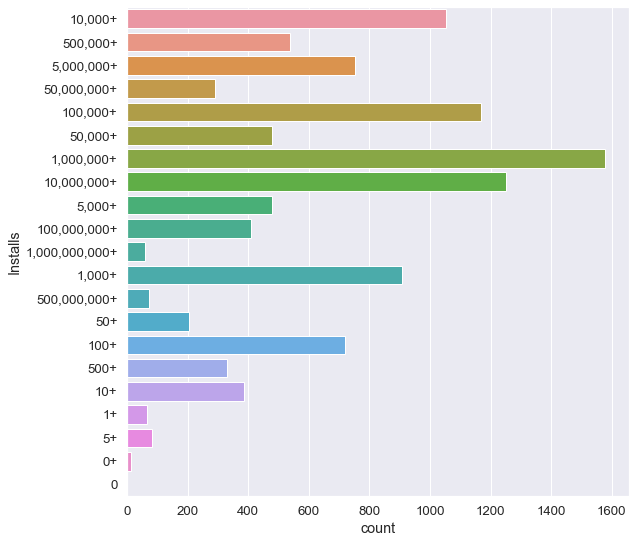

In [41]:
sns.countplot(y="Installs", data=df)

In [42]:
df["Installs"] = pd.to_numeric(df["Installs"], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   10841 non-null  object        
 1   Category              10840 non-null  object        
 2   Rating                9367 non-null   float64       
 3   Reviews               10841 non-null  float64       
 4   Installs              1 non-null      float64       
 5   Type                  10840 non-null  object        
 6   Content Rating        10841 non-null  object        
 7   Genres                10840 non-null  object        
 8   Current Ver           10832 non-null  object        
 9   Android Ver           10837 non-null  object        
 10  date_of_last_updated  10841 non-null  datetime64[ns]
 11  size_in_megabyte      8830 non-null   float64       
 12  price_in_dollars      10841 non-null  float64       
 13  year            

# Max installs for all apps

In [44]:
max_apps = df[['Installs', 'App']]

In [45]:
top15apps = max_apps.sort_values(by=["Installs", "App"], ascending=False).head(15)

In [46]:
top15apps

,Installs,App
9148,0.0,Command & Conquer: Rivals
882,NaN,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
7559,NaN,📏 Smart Ruler ↔️ cm/inch measuring for homework!
2575,NaN,"💘 WhatsLov: Smileys of love, stickers and GIF"
4362,NaN,💎 I'm rich
6334,NaN,"뽕티비 - 개인방송, 인터넷방송, BJ방송"
6420,NaN,감성학원 BL 첫사랑
9222,NaN,英漢字典 EC Dictionary
313,NaN,"漫咖 Comics - Manga,Novel and Stories"
5698,NaN,日本AV历史


# Max Rated  Apps



In [51]:
max_rated = df[['Rating', 'App']]

In [48]:
top_15_apps_rated = max_rated.sort_values(by=['Rating','App'], ascending=False).head(15)

In [49]:
top_15_apps_rated

,Rating,App
5482,5.0,meStudying: AP English Lit
7756,5.0,iReadMe
6030,5.0,iCard BD Plus
9178,5.0,i am EB
9427,5.0,ei Calc
9911,5.0,daskal.eu
8063,5.0,cx advance call blocker
9119,5.0,chat dz
2533,5.0,Zen Leaf
2458,5.0,You're an Anime


In [50]:
max_reviewed = df[['Reviews', 'App']]
top_reviewed_apps = max_reviewed.sort_values(by=["Reviews", "App"], ascending=False).head(15)
top_reviewed_apps

,Reviews,App
2544,78158306.0,Facebook
3943,78128208.0,Facebook
336,69119316.0,WhatsApp Messenger
381,69119316.0,WhatsApp Messenger
3904,69109672.0,WhatsApp Messenger
2604,66577446.0,Instagram
2545,66577313.0,Instagram
2611,66577313.0,Instagram
3909,66509917.0,Instagram
382,56646578.0,Messenger – Text and Video Chat for Free
